In [2]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install torchsummary

In [351]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [353]:
# 데이터 로드
data = pd.read_csv("C:\\Users\\LG\\Downloads\\BP_data.csv")

In [355]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [357]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [359]:
data.isnull().sum()
data = data.fillna(0)

In [361]:
# 특성과 타겟 분리
X = data.drop(columns=['Blood_Pressure_Abnormality']).values
y = data['Blood_Pressure_Abnormality'].values.astype(np.int64)  # 분류이므로 int64

In [363]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [365]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [367]:
import torch

# NumPy 배열을 Tensor로 변환 후 전처리
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [369]:
import torch

# NumPy 배열을 PyTorch Tensor로 변환하고 float32로 캐스팅
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [371]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [373]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [375]:
import torch.nn as nn

class diabetesDense(nn.Module):
    def __init__(self):
        super(diabetesDense, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(14, 64),   # 입력층 → 은닉층1
            nn.ReLU(),
            nn.Linear(64, 32),  # 은닉층1 → 은닉층2
            nn.ReLU(),
            nn.Linear(32, 1),   # 은닉층2 → 출력층
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# 모델 초기화
model = diabetesDense()

In [377]:
# 🔧 손실 함수 BCELoss로 수정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [379]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [381]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()  # 🔧 확률 기준 이진 분류
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6617, Accuracy: 70.50%
Epoch 2/20, Loss: 0.5696, Accuracy: 73.50%
Epoch 3/20, Loss: 0.5241, Accuracy: 71.75%
Epoch 4/20, Loss: 0.5077, Accuracy: 74.50%
Epoch 5/20, Loss: 0.4913, Accuracy: 76.75%
Epoch 6/20, Loss: 0.4773, Accuracy: 76.75%
Epoch 7/20, Loss: 0.4579, Accuracy: 79.00%
Epoch 8/20, Loss: 0.4396, Accuracy: 80.00%
Epoch 9/20, Loss: 0.4210, Accuracy: 81.75%
Epoch 10/20, Loss: 0.4044, Accuracy: 82.75%
Epoch 11/20, Loss: 0.3816, Accuracy: 85.75%
Epoch 12/20, Loss: 0.3631, Accuracy: 85.50%
Epoch 13/20, Loss: 0.3492, Accuracy: 86.00%
Epoch 14/20, Loss: 0.3362, Accuracy: 87.00%
Epoch 15/20, Loss: 0.3244, Accuracy: 85.50%
Epoch 16/20, Loss: 0.3153, Accuracy: 85.75%
Epoch 17/20, Loss: 0.3100, Accuracy: 85.50%
Epoch 18/20, Loss: 0.3050, Accuracy: 86.25%
Epoch 19/20, Loss: 0.2995, Accuracy: 86.25%
Epoch 20/20, Loss: 0.2954, Accuracy: 84.75%
Training complete.


In [382]:
from sklearn.metrics import precision_score

In [383]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (outputs >= 0.5).float()  # 🔧 이진 분류 방식에 맞는 예측
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

y_true = np.array(all_labels)
y_pred = np.array(all_predictions)

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[174  34]
 [ 27 165]]
F1 Score: 0.85
Precision: 0.85
Recall: 0.85
Specificity: 0.85


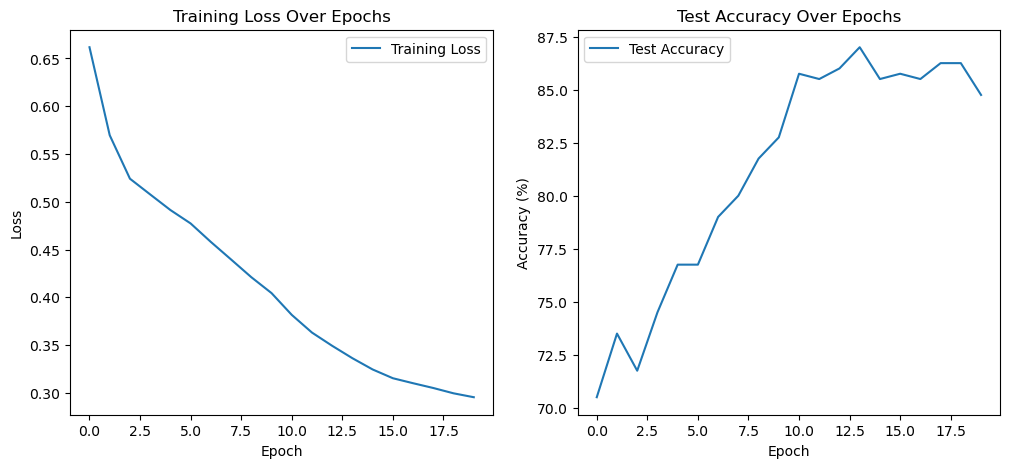

In [384]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [572]:
data = pd.read_csv("C:\\Users\\LG\\Downloads\\BP_data.csv")
data = data.fillna(0)

In [574]:
# 특성과 타겟 분리
X = data.drop(columns=['Blood_Pressure_Abnormality']).values
y = data['Blood_Pressure_Abnormality'].values.astype(np.int64)  # 분류이므로 int64

In [576]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [578]:
data_array = X  # ❌ y를 합치지 말아야 한다

In [580]:
data_array.shape

(2000, 14)

In [582]:
# Split sequences function
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Apply sequence transformation
n_steps = 5
X, y = split_sequences(data_array, n_steps)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [584]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1596, 5, 13), (1596,), (400, 5, 13), (400,))

In [586]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).permute(0, 2, 1)  # ✅
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32).permute(0, 2, 1)  # ✅
y_test = torch.tensor(y_test, dtype=torch.int64)

# Create DataLoader
train_dataloader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [588]:
import torch.nn as nn
import torch.nn.functional as F

class BPDense_Strong(nn.Module):
    def __init__(self):
        super(BPDense_Strong, self).__init__()
        self.conv1 = nn.Conv1d(13, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc1 = nn.Linear(256 * 5, 128)
        self.dropout = nn.Dropout(0.3)  # Dropout 약하게
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [590]:
# Initialize the model, loss function, and optimizer
model = BPDense1()

In [592]:
# Print the summary of the model
summary(model, input_size=(13, 5))  # ✅

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 32, 5]           1,280
       BatchNorm1d-2                [-1, 32, 5]              64
            Conv1d-3                [-1, 64, 5]           6,208
       BatchNorm1d-4                [-1, 64, 5]             128
            Linear-5                  [-1, 128]          41,088
           Dropout-6                  [-1, 128]               0
            Linear-7                    [-1, 2]             258
Total params: 49,026
Trainable params: 49,026
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


In [594]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)  # 학습률 좀 더 낮춤
criterion = nn.CrossEntropyLoss()
num_epochs = 100  # 충분히 학습

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

Epoch 1/100, Loss: 0.6950, Accuracy: 56.50%
Epoch 2/100, Loss: 0.6719, Accuracy: 52.75%
Epoch 3/100, Loss: 0.6622, Accuracy: 54.50%
Epoch 4/100, Loss: 0.6463, Accuracy: 54.25%
Epoch 5/100, Loss: 0.6308, Accuracy: 54.00%
Epoch 6/100, Loss: 0.6135, Accuracy: 53.50%
Epoch 7/100, Loss: 0.5950, Accuracy: 54.25%
Epoch 8/100, Loss: 0.5749, Accuracy: 54.50%
Epoch 9/100, Loss: 0.5527, Accuracy: 54.25%
Epoch 10/100, Loss: 0.5257, Accuracy: 52.50%
Epoch 11/100, Loss: 0.5007, Accuracy: 54.75%
Epoch 12/100, Loss: 0.4663, Accuracy: 49.25%
Epoch 13/100, Loss: 0.4429, Accuracy: 50.00%
Epoch 14/100, Loss: 0.4029, Accuracy: 53.25%
Epoch 15/100, Loss: 0.3869, Accuracy: 52.00%
Epoch 16/100, Loss: 0.3533, Accuracy: 51.00%
Epoch 17/100, Loss: 0.3118, Accuracy: 50.25%
Epoch 18/100, Loss: 0.2891, Accuracy: 53.50%
Epoch 19/100, Loss: 0.2538, Accuracy: 54.75%
Epoch 20/100, Loss: 0.2265, Accuracy: 52.75%
Epoch 21/100, Loss: 0.2121, Accuracy: 52.50%
Epoch 22/100, Loss: 0.1978, Accuracy: 52.75%
Epoch 23/100, Loss:

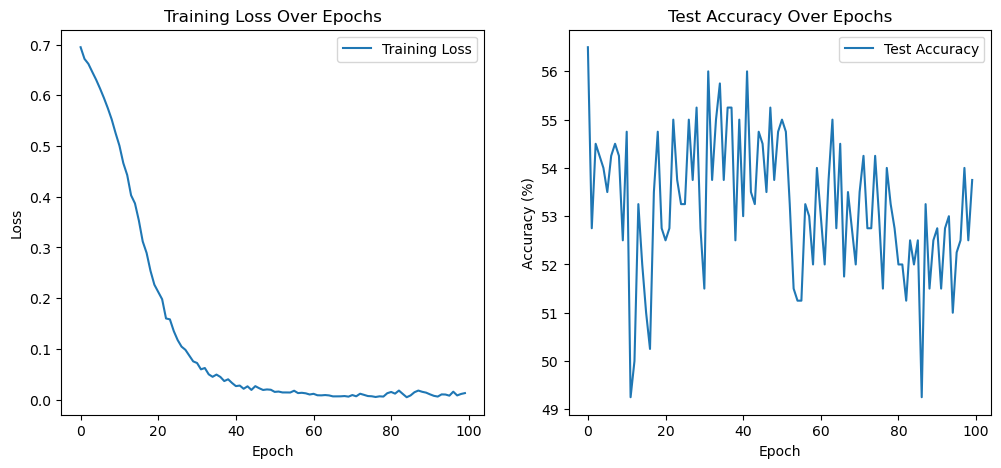

In [596]:
#Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
       
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# Print metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [597]:
import pandas as pd

data = pd.read_csv("C:\\Users\\LG\\Downloads\\BP_data.csv")
print(data['Blood_Pressure_Abnormality'].value_counts())

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64
